<a href="https://www.kaggle.com/code/vidhikishorwaghela/llm-detect-ai-generated-text?scriptVersionId=187822363" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# AI-Generated Text Detection using BERT

AI-Generated Text Detection project! In this project, I present a robust solution for detecting AI-generated text using BERT, a cutting-edge natural language processing model. Whether you're a researcher, developer, or a curious enthusiast, this project empowers you to explore, understand, and combat AI-generated content effectively.

# BERT, 
An acronym for Bidirectional Encoder Representations from Transformers, stands as an open-source machine learning framework designed for the realm of natural language processing (NLP). Originating in 2018, this framework was crafted by researchers from Google AI Language. The article aims to explore the architecture, working and applications of BERT.

# What is BERT?
BERT (Bidirectional Encoder Representations from Transformers) leverages a transformer-based neural network to understand and generate human-like language. BERT employs an encoder-only architecture. In the original Transformer architecture, there are both encoder and decoder modules. The decision to use an encoder-only architecture in BERT suggests a primary emphasis on understanding input sequences rather than generating output sequences.


## Table of Contents

- [Introduction](#introduction)
- [Features](#features)
- [Getting Started](#getting-started)
- [Contributing](#contributing)
- [License](#license)

## Introduction

AI-generated content is becoming increasingly sophisticated, making it challenging to distinguish between genuine and computer-generated text. Our project aims to tackle this issue by leveraging the power of BERT (Bidirectional Encoder Representations from Transformers) to identify and flag AI-generated text segments. Whether you're dealing with chatbots, articles, or social media posts, our solution offers accurate detection, ensuring the authenticity of digital content.

## Features

- **BERT-Powered Detection:** We utilize state-of-the-art BERT models to analyze the semantic context and linguistic nuances, enabling precise identification of AI-generated text.
- **Effortless Integration:** Seamlessly integrate our solution into your existing applications or workflows, ensuring hassle-free implementation for developers and researchers.
- **High Accuracy:** Our model is meticulously trained and fine-tuned to achieve high accuracy, minimizing false positives and false negatives for reliable results.
- **User-Friendly Interface:** With intuitive interfaces and clear instructions, users can easily navigate and utilize the detection tool without any technical expertise.


## How It Works

Our solution follows a comprehensive approach to AI-generated text detection:

**Data Preprocessing:** We clean and preprocess the textual data, removing noise and irrelevant information to enhance the accuracy of our model.

**BERT Tokenization:** Leveraging the BERT tokenizer, we encode the preprocessed text, preparing it for input into our detection model.

**Model Training:** Using a BERT-based sequence classification model, we train the system to distinguish between genuine and AI-generated text with a high degree of accuracy.

**Predictions:** Once trained, the model generates predictions for test data, highlighting potential AI-generated content segments.

**Result Analysis:** The results are saved in a CSV file, allowing users to review and analyze the detected segments along with their confidence scores.

## Contributing

We welcome contributions from the community! Whether you're a seasoned developer, a data science enthusiast, or a domain expert, your insights and expertise can enhance our project. 

Looking forward to get connect to some amazing peps out there!💃🏻


In [58]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from torch.optim.adamw import adamw
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split


In [59]:
# do a train-test split on the essays
essays = pd.read_csv("kaggle/input/Training_Essay_Data.csv")

# sample a small subset of the essays for faster training
essays = essays.sample(frac=0.01, random_state=42)


train_essays, test_essays = train_test_split(essays, test_size=0.2, random_state=42)


# save the train and test datasets to CSV files in the input directory
train_essays.to_csv("kaggle/input/train_essays.csv", index=False)
test_essays.to_csv("kaggle/input/test_essays.csv", index=False)


In [60]:
# Load the training and testing datasets
train_essays = pd.read_csv("kaggle/input/train_essays.csv")
test_essays = pd.read_csv("kaggle/input/test_essays.csv")

In [61]:
# Explore the training data
train_essays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       232 non-null    object
 1   generated  232 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.8+ KB


In [62]:
train_essays.head()

,text,generated
0,I gonna maybe take a long summer but i feel li...,0
1,"Have you ever met someone, or an interviewer, ...",0
2,The challenge of pursuiting and exploring Venu...,0
3,The Benefits of Volunteering at Local Animal S...,1
4,The consequences of a failure to educate are e...,1


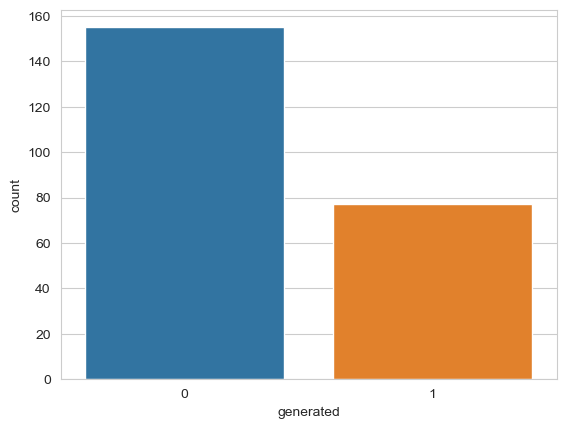

In [63]:
# Check for class balance
sns.countplot(data=train_essays, x='generated')
plt.show()


In [64]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [65]:
# Text Preprocessing
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuations
    words = text.split()  # Tokenize
    words = [word.lower() for word in words if word.isalpha()]  # Lowercase and remove non-alphabetic words
    words = [word for word in words if word not in stop_words]  # Remove stop words
    return ' '.join(words)

train_essays['clean_text'] = train_essays['text'].apply(clean_text)

In [66]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_essays['clean_text'], train_essays['generated'], test_size=0.2, random_state=42)


In [67]:
# Tokenization and Encoding for BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True, padding=True, truncation=True, max_length=128)


In [68]:
print(torch.__version__)


2.6.0+cpu


In [69]:
encoded_train = tokenizer(X_train.tolist(), padding=True, truncation=True, return_tensors='pt')
encoded_val = tokenizer(X_val.tolist(), padding=True, truncation=True, return_tensors='pt')


In [70]:
# Convert labels to tensors
train_labels = torch.tensor(y_train.values)
val_labels = torch.tensor(y_val.values)


In [71]:
# Create TensorDatasets
train_dataset = TensorDataset(encoded_train['input_ids'], encoded_train['attention_mask'], train_labels)
val_dataset = TensorDataset(encoded_val['input_ids'], encoded_val['attention_mask'], val_labels)


In [72]:
# DataLoader for efficient processing
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

In [73]:
# Define the BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [74]:
from transformers.optimization import AdamW



In [75]:
# Define optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
epochs = 10

C:\Users\david\anaconda3\Lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
import time

# Training loop with timing
for epoch in range(epochs):
    start_time = time.time()
    model.train()
    total_loss = 0

    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # Gradient clipping to avoid exploding gradients
        optimizer.step()

    avg_train_loss = total_loss / len(train_loader)
    epoch_time = time.time() - start_time
    print(f"Epoch {epoch + 1}/{epochs}, Average Training Loss: {avg_train_loss:.2f}, Time: {epoch_time:.2f} seconds")

In [ ]:
# Validation loop
model.eval()
val_preds = []
val_labels = []

with torch.no_grad():
    for batch in val_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        val_preds.extend(torch.argmax(logits, dim=1).cpu().numpy())
        val_labels.extend(labels.cpu().numpy())


In [ ]:
# Calculate validation accuracy
val_accuracy = accuracy_score(val_labels, val_preds)
print(f"Validation Accuracy: {val_accuracy:.2f}")

In [ ]:
# Test data processing
test_inputs = tokenizer(test_essays['text'].tolist(), padding=True, truncation=True, return_tensors='pt')

# Move input tensor to the same device as the model
test_inputs = {key: value.to(device) for key, value in test_inputs.items()}

# Generate predictions using your trained model
with torch.no_grad():
    outputs = model(**test_inputs)
    logits = outputs.logits

# Assuming the first column of logits corresponds to the negative class (non-AI-generated) 
# and the second column corresponds to the positive class (AI-generated)
predictions = torch.softmax(logits, dim=1)[:, 1].cpu().numpy()  # Move predictions back to CPU

# Create a submission DataFrame with essay IDs and corresponding predictions
submission = pd.DataFrame({
    'id': test_essays['id'],
    'generated': predictions
})

# Save the submission DataFrame to a CSV file
submission.to_csv('/kaggle/working/submission.csv', index=False)
